In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd

import os 
from scipy import stats
import matplotlib.pyplot as plt
import re
import hvplot

import warnings
warnings.filterwarnings("ignore")
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Load the CSV file located on BPD website into a Pandas DataFrame
arrest_data_df = pd.read_csv("Data/BPD_Arrests.csv")
# Display sample data
arrest_data_df.head()

,X,Y,arrestnumber,age,gender,race,arrestdatetime,arrestlocation,incidentoffence,incidentlocation,...,chargedescription,district,post,neighborhood,latitude,longitude,geolocation,incidentnumber,objectid,shape
0,1.401347e+06,608148.870493,23000037.0,39.0,M,B,2022/12/31 23:50:00+00,4000 OAKFORD ST,Unknown Offense,4000 OAKFORD ST,...,HGV,Northwest,621,West Arlington,39.3361,-76.6853,"(39.3361,-76.6853)",22L09338,1,NaN
1,1.401347e+06,608148.870493,23000039.0,50.0,M,B,2022/12/31 23:50:00+00,4000 OAKFORD ST,Unknown Offense,4000 OAKFORD ST,...,HGV,Northwest,621,West Arlington,39.3361,-76.6853,"(39.3361,-76.6853)",22L09338,2,NaN
2,NaN,NaN,23000010.0,27.0,M,B,2022/12/31 23:40:00+00,NaN,Unknown Offense,NaN,...,FAILURE TO APPEAR,NaN,NaN,NaN,NaN,NaN,"(,)",NaN,3,NaN
3,1.417636e+06,595206.835862,23000050.0,42.0,M,B,2022/12/31 23:15:00+00,500 DOLPHIN ST,Unknown Offense,500 DOLPHIN ST,...,HGV,Central,123,Upton,39.3004,-76.6279,"(39.3004,-76.6279)",22L09343,4,NaN
4,NaN,NaN,22157188.0,31.0,M,B,2022/12/31 21:00:00+00,NaN,Unknown Offense,NaN,...,FAILURE TO APPEAR,NaN,NaN,NaN,NaN,NaN,"(,)",NaN,5,NaN


In [3]:
import pandas as pd
import pytz

# Convert date values to datetime format and convert to UTC timezone
arrest_data_df["arrestdatetime"] = pd.to_datetime(arrest_data_df["arrestdatetime"]).dt.tz_convert(pytz.UTC)

# Define the desired time frame in UTC
start_date = pd.Timestamp("2018-01-01", tz=pytz.UTC)
end_date = pd.Timestamp("2022-12-31", tz=pytz.UTC)

# Filter the DataFrame based on the time frame
sample_arrests = (arrest_data_df["arrestdatetime"] >= start_date) & (arrest_data_df["arrestdatetime"] <= end_date)

# Apply the filter to get the narrowed down data
narrowed_data = arrest_data_df[sample_arrests]
narrowed_data

,X,Y,arrestnumber,age,gender,race,arrestdatetime,arrestlocation,incidentoffence,incidentlocation,...,chargedescription,district,post,neighborhood,latitude,longitude,geolocation,incidentnumber,objectid,shape
20,1.407598e+06,592946.031158,22000022.0,18.0,M,B,2021-12-31 23:14:00+00:00,2800 EDMONDSON AVE,Unknown Offense,2800 EDMONDSON AVE,...,HGV,Western,721,Penrose/Fayette Street Outreach,39.2943,-76.6634,"(39.2943,-76.6634)",NaN,21,NaN
21,1.425747e+06,617095.607199,22000010.0,26.0,M,B,2021-12-31 22:09:00+00:00,5700 NORTHWOOD DR,Unknown Offense,5700 NORTHWOOD DR,...,HGV,Northern,523,Chinquapin Park,39.3604,-76.5989,"(39.3604,-76.5989)",NaN,22,NaN
22,NaN,NaN,21168317.0,24.0,M,B,2021-12-31 21:00:00+00:00,NaN,Unknown Offense,NaN,...,RAPE SECOND DEGREE,NaN,NaN,NaN,NaN,NaN,"(,)",NaN,23,NaN
23,NaN,NaN,21168316.0,28.0,M,B,2021-12-31 18:21:00+00:00,NaN,Unknown Offense,NaN,...,ASSAULT-SEC DEGREE,NaN,NaN,NaN,NaN,NaN,"(,)",NaN,24,NaN
24,NaN,NaN,21168315.0,28.0,M,B,2021-12-31 18:21:00+00:00,NaN,Unknown Offense,NaN,...,"THEFT: $100 TO UNDER $1,500",NaN,NaN,NaN,NaN,NaN,"(,)",NaN,25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361709,1.420414e+06,600936.840992,18000038.0,58.0,M,B,2018-01-01 05:30:00+00:00,2300 MARYLAND AVE,5DBURG. OTH. (FORCE),2300 MARYLAND AVE,...,COMMON ASSAULT,Northern,514,Old Goucher,39.3161,-76.6180,"(39.3161,-76.618)",18E00079,361710,NaN
361710,1.438912e+06,590603.655722,NaN,30.0,M,U,2018-01-01 05:00:00+00:00,5100 EASTERN AVE,Unknown Offense,5100 EASTERN AVE,...,Unknown Charge,Southeast,232,Hopkins Bayview,39.2875,-76.5528,"(39.2875,-76.5528)",NaN,361711,NaN
361711,NaN,NaN,18000042.0,41.0,F,B,2018-01-01 04:15:00+00:00,NaN,Unknown Offense,NaN,...,FAILURE TO APPEAR,NaN,NaN,NaN,NaN,NaN,"(,)",NaN,361712,NaN
361712,1.404662e+06,590859.232391,NaN,38.0,M,U,2018-01-01 03:43:00+00:00,100 KOSSUTH ST,Unknown Offense,100 KOSSUTH ST,...,Unknown Charge,Southwest,835,Saint Josephs,39.2886,-76.6738,"(39.2886,-76.6738)",NaN,361713,NaN


In [4]:
####Set Date Range and perform Temporal Analysis

In [54]:
# Convert `arrestdatetime` column to datetime if it's not already in that format
narrowed_data["arrestdatetime"] = pd.to_datetime(narrowed_data["arrestdatetime"])

# Extract month and year components from the `arrestdatetime` column
narrowed_data["arrest_month"] = narrowed_data["arrestdatetime"].dt.month
narrowed_data["arrest_year"] = narrowed_data["arrestdatetime"].dt.year

# Group the data by month and year and count the number of arrests
arrest_counts = narrowed_data.groupby(["arrest_month", "arrest_year"]).size().reset_index(name="arrest_count")

# Print the resulting arrest counts
print(arrest_counts)


    arrest_month  arrest_year  arrest_count
0              1         2018          1976
1              1         2019          1670
2              1         2020          1512
3              1         2021           955
4              1         2022           889
5              2         2018          1677
6              2         2019          1561
7              2         2020          1460
8              2         2021           856
9              2         2022           856
10             3         2018          1798
11             3         2019          1737
12             3         2020          1253
13             3         2021           989
14             3         2022           917
15             4         2018          1670
16             4         2019          1944
17             4         2020           806
18             4         2021           882
19             4         2022           873
20             5         2018          1632
21             5         2019   

Text(0, 0.5, 'Arrest Count')

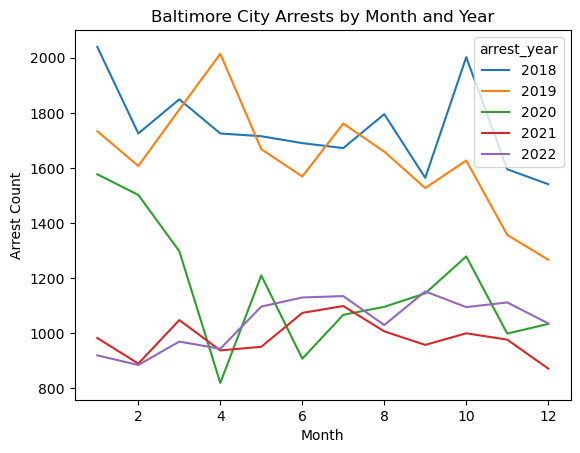

In [6]:
#Grouping month and year
arrest_counts_grouped = arrest_counts.groupby(['arrest_month', 'arrest_year']).sum().reset_index()

# Plotting the grouped data
arrest_counts_grouped.pivot(index='arrest_month', columns='arrest_year', values='arrest_count').plot(kind='line')

#labeling
plt.title("Baltimore City Arrests by Month and Year")
plt.xlabel("Month")
plt.ylabel("Arrest Count")


In [7]:
####Review Offenses

In [8]:
# Remove rows where 'chargedescription' is 'Unknown Charge'
narrowed_data = narrowed_data[narrowed_data['chargedescription'] != 'Unknown Charge']

# Display the updated DataFrame
narrowed_data


,X,Y,arrestnumber,age,gender,race,arrestdatetime,arrestlocation,incidentoffence,incidentlocation,...,post,neighborhood,latitude,longitude,geolocation,incidentnumber,objectid,shape,arrest_month,arrest_year
20,1.407598e+06,592946.031158,22000022.0,18.0,M,B,2021-12-31 23:14:00+00:00,2800 EDMONDSON AVE,Unknown Offense,2800 EDMONDSON AVE,...,721,Penrose/Fayette Street Outreach,39.2943,-76.6634,"(39.2943,-76.6634)",NaN,21,NaN,12,2021
21,1.425747e+06,617095.607199,22000010.0,26.0,M,B,2021-12-31 22:09:00+00:00,5700 NORTHWOOD DR,Unknown Offense,5700 NORTHWOOD DR,...,523,Chinquapin Park,39.3604,-76.5989,"(39.3604,-76.5989)",NaN,22,NaN,12,2021
22,NaN,NaN,21168317.0,24.0,M,B,2021-12-31 21:00:00+00:00,NaN,Unknown Offense,NaN,...,NaN,NaN,NaN,NaN,"(,)",NaN,23,NaN,12,2021
23,NaN,NaN,21168316.0,28.0,M,B,2021-12-31 18:21:00+00:00,NaN,Unknown Offense,NaN,...,NaN,NaN,NaN,NaN,"(,)",NaN,24,NaN,12,2021
24,NaN,NaN,21168315.0,28.0,M,B,2021-12-31 18:21:00+00:00,NaN,Unknown Offense,NaN,...,NaN,NaN,NaN,NaN,"(,)",NaN,25,NaN,12,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361707,NaN,NaN,18000050.0,29.0,F,W,2018-01-01 09:45:00+00:00,NaN,Unknown Offense,NaN,...,NaN,NaN,NaN,NaN,"(,)",NaN,361708,NaN,1,2018
361708,1.432485e+06,603102.765099,18000045.0,46.0,M,B,2018-01-01 08:00:00+00:00,3200 HARWELL AVE,79OTHER,3200 HARWELL AVE,...,432,Belair-Edison,39.3219,-76.5753,"(39.3219,-76.5753)",18A00083,361709,NaN,1,2018
361709,1.420414e+06,600936.840992,18000038.0,58.0,M,B,2018-01-01 05:30:00+00:00,2300 MARYLAND AVE,5DBURG. OTH. (FORCE),2300 MARYLAND AVE,...,514,Old Goucher,39.3161,-76.6180,"(39.3161,-76.618)",18E00079,361710,NaN,1,2018
361711,NaN,NaN,18000042.0,41.0,F,B,2018-01-01 04:15:00+00:00,NaN,Unknown Offense,NaN,...,NaN,NaN,NaN,NaN,"(,)",NaN,361712,NaN,1,2018


In [42]:
#group together repetetive charge descriptions for cleaner data
# Copy the narrowed_data DataFrame
grouped_charges = narrowed_data.copy()

# Combine assault charge descriptions
grouped_charges.loc[grouped_charges['chargedescription'].str.contains('assault', case=False), 'chargedescription'] = 'Assault Charges'

# Combine narcotic descriptions
grouped_charges.loc[grouped_charges['chargedescription'].str.contains('cds', case=False), 'chargedescription'] = 'Narcotic Charges'

#combine all the handgun descriptions
grouped_charges.loc[grouped_charges['chargedescription'].str.contains('HGV|handgun', case=False), 'chargedescription'] = 'Handgun Charges'

#Combine all the robbery charge descriptions
grouped_charges.loc[grouped_charges['chargedescription'].str.contains('robbery', case=False), 'chargedescription'] = 'Robbery Charges'

#Combine all the larceny descriptions
grouped_charges.loc[grouped_charges['chargedescription'].str.contains('larceny|theft', case=False), 'chargedescription'] = 'Larceny Charges'

#Combine all the burglary charge descriptions
grouped_charges.loc[grouped_charges['chargedescription'].str.contains('burglary', case=False), 'chargedescription'] = 'Burglary Charges'
grouped_charges

,X,Y,arrestnumber,age,gender,race,arrestdatetime,arrestlocation,incidentoffence,incidentlocation,...,neighborhood,latitude,longitude,geolocation,incidentnumber,objectid,shape,arrest_month,arrest_year,combined_chargedescription
20,1.407598e+06,592946.031158,22000022.0,18.0,M,B,2021-12-31 23:14:00+00:00,2800 EDMONDSON AVE,Unknown Offense,2800 EDMONDSON AVE,...,Penrose/Fayette Street Outreach,39.2943,-76.6634,"(39.2943,-76.6634)",NaN,21,NaN,12,2021,HGV
21,1.425747e+06,617095.607199,22000010.0,26.0,M,B,2021-12-31 22:09:00+00:00,5700 NORTHWOOD DR,Unknown Offense,5700 NORTHWOOD DR,...,Chinquapin Park,39.3604,-76.5989,"(39.3604,-76.5989)",NaN,22,NaN,12,2021,HGV
22,NaN,NaN,21168317.0,24.0,M,B,2021-12-31 21:00:00+00:00,NaN,Unknown Offense,NaN,...,NaN,NaN,NaN,"(,)",NaN,23,NaN,12,2021,RAPE SECOND DEGREE
23,NaN,NaN,21168316.0,28.0,M,B,2021-12-31 18:21:00+00:00,NaN,Unknown Offense,NaN,...,NaN,NaN,NaN,"(,)",NaN,24,NaN,12,2021,Combined Assault Charges
24,NaN,NaN,21168315.0,28.0,M,B,2021-12-31 18:21:00+00:00,NaN,Unknown Offense,NaN,...,NaN,NaN,NaN,"(,)",NaN,25,NaN,12,2021,"THEFT: $100 TO UNDER $1,500"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361707,NaN,NaN,18000050.0,29.0,F,W,2018-01-01 09:45:00+00:00,NaN,Unknown Offense,NaN,...,NaN,NaN,NaN,"(,)",NaN,361708,NaN,1,2018,CDS:POSSESS-NOT MARIJUANA
361708,1.432485e+06,603102.765099,18000045.0,46.0,M,B,2018-01-01 08:00:00+00:00,3200 HARWELL AVE,79OTHER,3200 HARWELL AVE,...,Belair-Edison,39.3219,-76.5753,"(39.3219,-76.5753)",18A00083,361709,NaN,1,2018,Combined Assault Charges
361709,1.420414e+06,600936.840992,18000038.0,58.0,M,B,2018-01-01 05:30:00+00:00,2300 MARYLAND AVE,5DBURG. OTH. (FORCE),2300 MARYLAND AVE,...,Old Goucher,39.3161,-76.6180,"(39.3161,-76.618)",18E00079,361710,NaN,1,2018,Combined Assault Charges
361711,NaN,NaN,18000042.0,41.0,F,B,2018-01-01 04:15:00+00:00,NaN,Unknown Offense,NaN,...,NaN,NaN,NaN,"(,)",NaN,361712,NaN,1,2018,FAILURE TO APPEAR


In [46]:
# Filter the top 10 charges for comparison based on charge description
top_10_charges = grouped_charges["combined_chargedescription"].value_counts().nlargest(10).index
filtered_data = grouped_charges[grouped_charges["combined_chargedescription"].isin(top_10_charges)]

# Print the filtered data
filtered_data

,X,Y,arrestnumber,age,gender,race,arrestdatetime,arrestlocation,incidentoffence,incidentlocation,...,neighborhood,latitude,longitude,geolocation,incidentnumber,objectid,shape,arrest_month,arrest_year,combined_chargedescription
20,1.407598e+06,592946.031158,22000022.0,18.0,M,B,2021-12-31 23:14:00+00:00,2800 EDMONDSON AVE,Unknown Offense,2800 EDMONDSON AVE,...,Penrose/Fayette Street Outreach,39.2943,-76.6634,"(39.2943,-76.6634)",NaN,21,NaN,12,2021,HGV
21,1.425747e+06,617095.607199,22000010.0,26.0,M,B,2021-12-31 22:09:00+00:00,5700 NORTHWOOD DR,Unknown Offense,5700 NORTHWOOD DR,...,Chinquapin Park,39.3604,-76.5989,"(39.3604,-76.5989)",NaN,22,NaN,12,2021,HGV
23,NaN,NaN,21168316.0,28.0,M,B,2021-12-31 18:21:00+00:00,NaN,Unknown Offense,NaN,...,NaN,NaN,NaN,"(,)",NaN,24,NaN,12,2021,Combined Assault Charges
29,1.436578e+06,593178.412693,21168297.0,36.0,M,U,2021-12-31 14:50:00+00:00,100 JANNEY ST,Unknown Offense,100 JANNEY ST,...,Kresson,39.2946,-76.5610,"(39.2946,-76.561)",21L08430,30,NaN,12,2021,Combined Assault Charges
30,1.428927e+06,601702.345035,22000016.0,25.0,M,B,2021-12-31 12:51:00+00:00,2700 ST. LO DR,Unknown Offense,2700 ST. LO DR,...,Clifton Park,39.3181,-76.5879,"(39.3181,-76.5879)",22A00006,31,NaN,12,2021,HGV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361706,1.427588e+06,603736.077990,18000078.0,23.0,F,B,2018-01-01 10:00:00+00:00,1600 E. 28TH ST,4ECOMMON ASSAULT,1600 E. 28TH ST,...,Coldstream Homestead Montebello,39.3237,-76.5926,"(39.3237,-76.5926)",18A00107,361707,NaN,1,2018,Combined Assault Charges
361708,1.432485e+06,603102.765099,18000045.0,46.0,M,B,2018-01-01 08:00:00+00:00,3200 HARWELL AVE,79OTHER,3200 HARWELL AVE,...,Belair-Edison,39.3219,-76.5753,"(39.3219,-76.5753)",18A00083,361709,NaN,1,2018,Combined Assault Charges
361709,1.420414e+06,600936.840992,18000038.0,58.0,M,B,2018-01-01 05:30:00+00:00,2300 MARYLAND AVE,5DBURG. OTH. (FORCE),2300 MARYLAND AVE,...,Old Goucher,39.3161,-76.6180,"(39.3161,-76.618)",18E00079,361710,NaN,1,2018,Combined Assault Charges
361711,NaN,NaN,18000042.0,41.0,F,B,2018-01-01 04:15:00+00:00,NaN,Unknown Offense,NaN,...,NaN,NaN,NaN,"(,)",NaN,361712,NaN,1,2018,FAILURE TO APPEAR


In [59]:
# Group the data by month and year and count the number of arrests
charge_count = filtered_data.groupby(["arrest_year", "combined_chargedescription"]).size().reset_index(name="arrest_year")

# Print the resulting DataFrame
charge_count

ValueError: cannot insert arrest_year, already exists

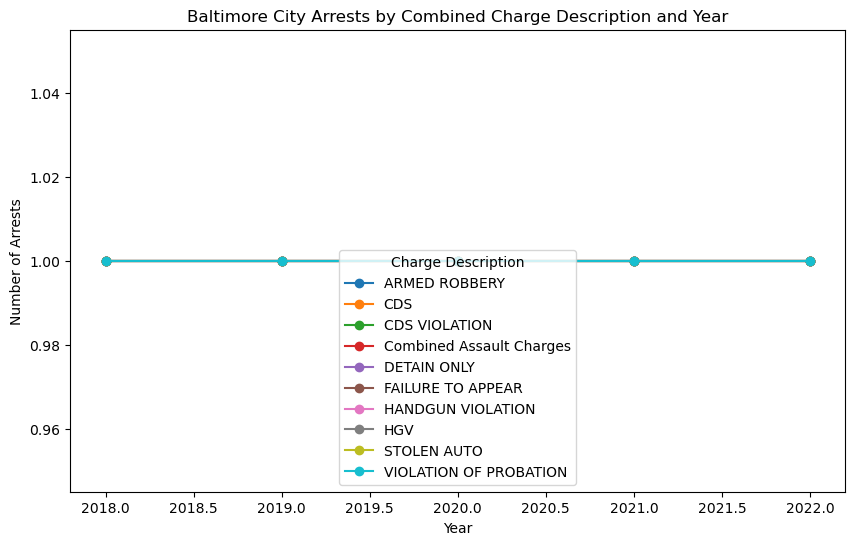

In [52]:
# Group the data and calculate the count of each charge description for each year
grouped_data = filtered_data.groupby(['arrest_year', 'combined_chargedescription']).()

# Plotting the grouped data
grouped_data.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Baltimore City Arrests by Combined Charge Description and Year")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.legend(title="Charge Description")
plt.show()

In [40]:
grouped_charges_all.to_csv("Data/grouped_charges.csv")